<a href="https://colab.research.google.com/github/levanphuoc-dev/CS112.L21/blob/main/CS112.L21/week_4/VQ21_Wall/WALL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NHÓM L21.N02**

Thành viên:
  1. Nguyễn Xuân Minh - 19521848	
  2. Lê Văn Phước - 19522054
  3. Nguyễn Đức Thắng - 19522206
  4. Trầm Hữu Nguyên - 19521921

**ĐỀ BÀI:**

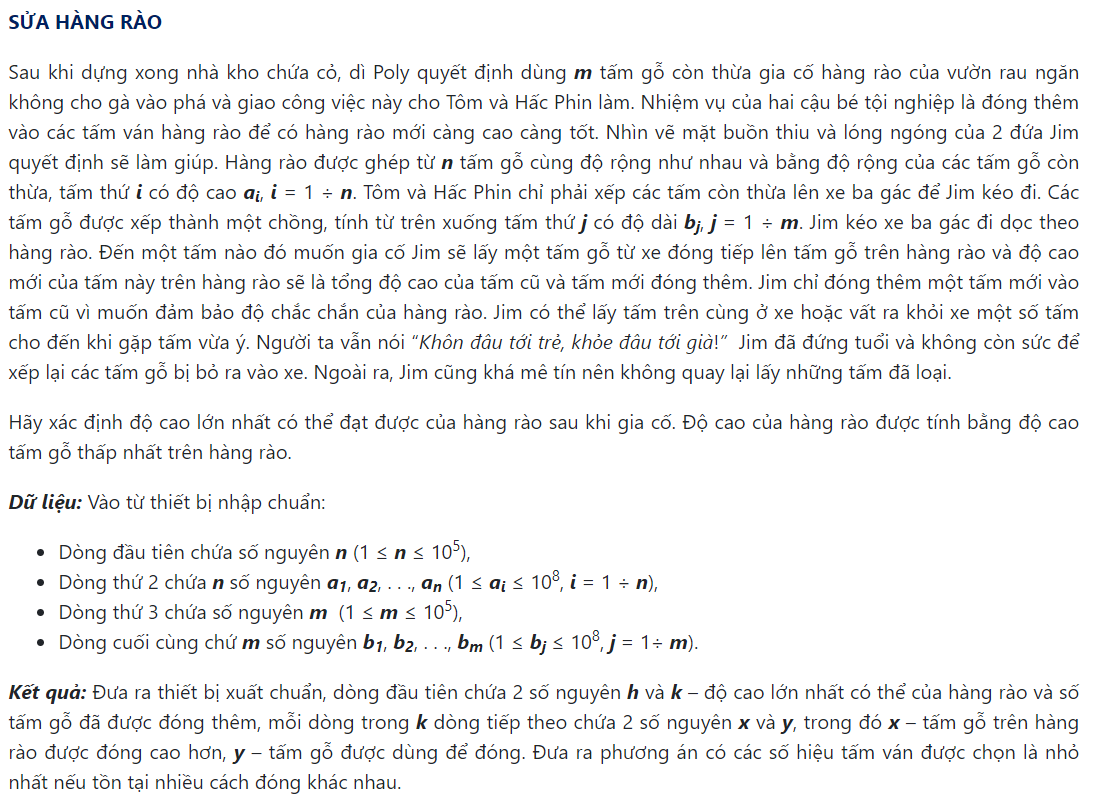
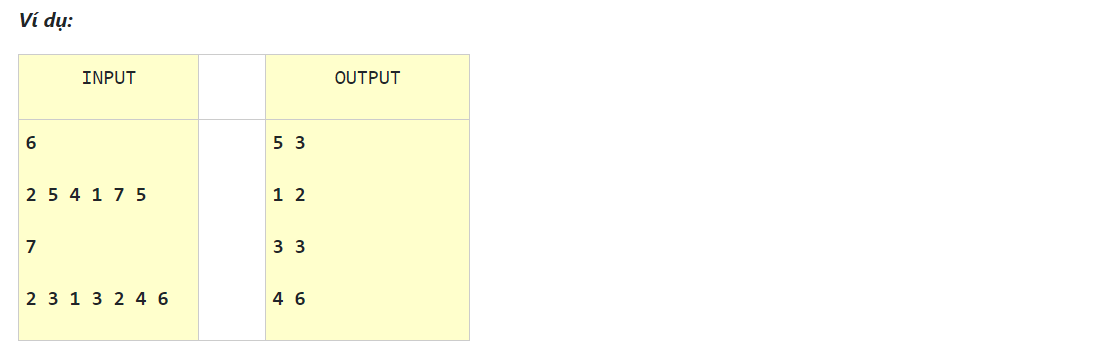



**1. Abstraction (Trừu tượng hóa):**

+ Dùng m tấm gỗ thừa gia cố hàng rào
+ Hàng rào được ghép từ n tấm gỗ
+ Xác định độ cao lớn nhất có thể đạt được của hàng rào sau khi gia cố. Độ cao của hàng rào được tính bằng độ cao tấm gỗ thấp nhất trên hàng rào.
+ Với mỗi h (chiều cao hàng rào sau khi gia cố), ta lưu vị trí (i, j) tìm được (i là vị trí tấm ván ở hàng rào cũ, j là vị trí tấm ván vừa gia cố).

**2. Pattern recognition (Nhận dạng mẫu):**

+ Kỹ thuật áp dụng: Duyệt mảng.
+ Đặc điểm nhận dạng:
  - Tìm chiều cao h với giả thiết của bài toán.
  - Theo giả thiết bài toán, chiều cao h giao động trong khoảng từ 0 đến trường hợp xấu nhất là 2*10^8

**3. Algorithm designed (Thiết kế thuật toán):**

**3.1 Mã giả:**

+ Lấy giá trị ban đầu cho minHeight = 0 và maxHeight = 2*10^8.
+ Lặp với điều kiện maxHeight - minHeight > 1
  - Gán avgHeight = minHeight + (maxHeight - minHeight) / 2
  - Kiểm tra chiều cao h với:
    + Gán j = 0
    + Lặp mảng oldWalls chạy từ i = 0 đến n - 1
      - Lặp với điều kiện j < m và oldWall[i] + leftoverWoods[j] < h
      - Kiểm tra điều kiện oldWalls[i] < h và j == m thì trả về False
      - Kiểm tra oldWall[i] < h thì tăng j lên 1
      - Trả về true
  - Nếu điều kiện h đúng thì minHeight = avgHeight
  - Ngược lại thì maxHeight = avgHeight
+ Duyệt list oldWalls
  - Lặp kiểm tra điều kiện j < m và oldWalls[i] + leftoverWoods[j] < h, đúng thì tăng j lên 1
  - Kiểm tra điều kiện oldWalls[i] < h and j == m, nếu đúng thì trả về mảng kết quả arr_result
  - Kiểm tra điều kiện oldWalls[i] < h, thì lưu giá trị [i + 1, j + 1] vào mảng arr_result
+ In ra yêu cầu bài toán.

**3.2 Đánh giá độ phức tạp:**
+ Độ phức tạp của bài toán khi giải với cách trên là O(nlogk) với k = 2*10^8

**3.3 Code:**


In [1]:
n = int(input())

if n < 1 or n > 10**5:
    exit(0)

oldWalls = list(map(int, input().split()))[:n]

for i in range(len(oldWalls)):
    if oldWalls[i] < 1 or oldWalls[i] > 10**8:
        exit(0)

m = int(input())
if n < 1 or n > 10**5:
    exit(0)

leftoverWoods = list(map(int, input().split()))[:m]

for i in range(len(leftoverWoods)):
    if leftoverWoods[i] < 1 or leftoverWoods[i] > 10**8:
        exit(0)

def checkHeight(h, oldWalls, leftoverWoods, m, n):
    j = 0
    for i in range(n):
        while (j < m and oldWalls[i] + leftoverWoods[j] < h):
            j += 1
        if oldWalls[i] < h and j == m:
            return False
        if oldWalls[i] < h:
            j += 1
    return True

def getResult(h, oldWalls, leftoverWoods, m, n):
    j = 0
    arr_result = []
    for i in range(n):
        while (j < m and oldWalls[i] + leftoverWoods[j] < h):
            j += 1
        if oldWalls[i] < h and j == m:
            return arr_result
        if oldWalls[i] < h:
            arr_result.append([i + 1, j + 1])
            j += 1
    return arr_result


minHeight, maxHeight = 0, int(2*10**8)

while maxHeight - minHeight > 1:
    avgHeight = minHeight + (maxHeight - minHeight) // 2
    check = checkHeight(avgHeight, oldWalls, leftoverWoods, m, n)
    if check:
        minHeight = avgHeight
    else:
        maxHeight = avgHeight

arr_result = getResult(maxHeight - 1, oldWalls, leftoverWoods, m, n)

print(str(maxHeight - 1), str(len(arr_result)), sep=' ', end='\n')
for pos in range(len(arr_result)):
    print(*arr_result[pos], sep=' ', end='\n')

6
2 5 4 1 7 5
7
2 3 1 3 2 4 6
5 3
1 2
3 3
4 6
